In [1]:
!python -V

Python 3.9.12


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
"""
Q1: We'll use the same NYC taxi dataset, but instead 
of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

16
17
18
19
"""

'\nQ1: We\'ll use the same NYC taxi dataset, but instead \nof "Green Taxi Trip Records", we\'ll use "Yellow Taxi Trip Records".\n\nDownload the data for January and February 2023.\n\nRead the data for January. How many columns are there?\n\n16\n17\n18\n19\n'

In [4]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [5]:
df_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [6]:
df_feb

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.40,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.00,-1.00,-0.5,0.00,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.00,1.00,0.5,0.00,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.90,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.00,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65,NaN,None,249,140,0,20.22,0.00,0.5,4.84,0.0,1.0,29.06,NaN,NaN
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47,NaN,None,186,79,0,13.66,0.00,0.5,2.65,0.0,1.0,20.31,NaN,NaN
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49,NaN,None,158,143,0,17.64,0.00,0.5,0.00,0.0,1.0,21.64,NaN,NaN
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13,NaN,None,79,162,0,13.56,0.00,0.5,2.63,0.0,1.0,20.19,NaN,NaN


In [7]:
#Q1 answer: 19 cols

In [8]:
"""
Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.
What's the standard deviation of the trips duration in January?
32.59
42.59
52.59
62.59
"""

"\nQ2. Computing duration\nNow let's compute the duration variable. It should contain the duration of a ride in minutes.\nWhat's the standard deviation of the trips duration in January?\n32.59\n42.59\n52.59\n62.59\n"

In [9]:
df_jan['duration'] = df_jan['tpep_dropoff_datetime'] - df_jan['tpep_pickup_datetime']
df_jan['duration'] = df_jan['duration'].apply(lambda td: td.total_seconds() / 60)


In [10]:

print(f'Answer Q2: {df_jan.duration.std()}')

Answer Q2: 42.594351241920904


In [11]:
"""
Q3. Dropping outliers
Next, we need to check the distribution of the duration variable.
There are some outliers. 
Let's remove them and keep only the records where the duration 
was between 1 and 60 minutes (inclusive).
What fraction of the records left after you dropped the outliers?

90%
92%
95%
98%
"""

"\nQ3. Dropping outliers\nNext, we need to check the distribution of the duration variable.\nThere are some outliers. \nLet's remove them and keep only the records where the duration \nwas between 1 and 60 minutes (inclusive).\nWhat fraction of the records left after you dropped the outliers?\n\n90%\n92%\n95%\n98%\n"

In [12]:
df_jan.duration.mean()

15.668995167332046

In [13]:
df_jan.duration.std()

42.594351241920904

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

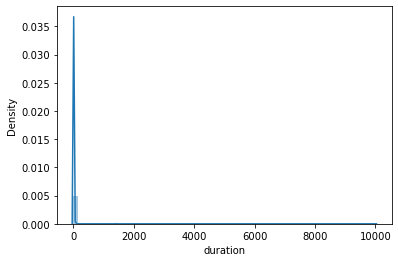

In [14]:
sns.distplot(df_jan.duration)

In [15]:
total_req = len(df_jan)
df_jan = df_jan[(df_jan['duration'] <= 60) & (df_jan['duration'] >= 1)]

In [16]:
df_jan


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [17]:
print('Q3 Answer: ' + str(len(df_jan) / total_req  * 100))

Q3 Answer: 98.1220282212598


In [18]:
"""
Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

2
155
345
515
715
"""

"\nQ4. One-hot encoding\nLet's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.\n\nTurn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)\nFit a dictionary vectorizer\nGet a feature matrix from it\nWhat's the dimensionality of this matrix (number of columns)?\n\n2\n155\n345\n515\n715\n"

In [19]:
categorical = ['PULocationID','DOLocationID']
df_jan[categorical] = df_jan[categorical].astype(str)

dv = DictVectorizer()

train_dicts = df_jan[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

/tmp/ipykernel_61530/1387877237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan[categorical] = df_jan[categorical].astype(str)


In [20]:
df_feb['duration'] = df_feb['tpep_dropoff_datetime'] - df_feb['tpep_pickup_datetime']
df_feb['duration'] = df_feb['duration'].apply(lambda td: td.total_seconds() / 60)
df_feb = df_feb[(df_feb['duration'] >= 1) & (df_feb['duration'] <= 60)]
categorical = ['PULocationID','DOLocationID']
df_feb[categorical] = df_feb[categorical].astype(str)
val_dicts = df_feb[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_feb['duration']


/tmp/ipykernel_61530/773413253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feb[categorical] = df_feb[categorical].astype(str)


In [22]:
X_val.shape

(2855951, 515)

In [23]:
y_val.shape

(2855951,)

In [24]:
print(f'Q4 Answer: {X_train.shape[1]}')
print(f'shape: {X_train.shape}')


Q4 Answer: 515
shape: (3009173, 515)


In [25]:
"""
Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?

3.64
7.64
11.64
16.64
"""

"\nQ5. Training a model\nNow let's use the feature matrix from the previous step to train a model.\n\nTrain a plain linear regression model with default parameters, where duration is the response variable\nCalculate the RMSE of the model on the training data\nWhat's the RMSE on train?\n\n3.64\n7.64\n11.64\n16.64\n"

In [26]:
y_train = df_jan['duration']

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

7.6492610279057605

In [29]:
"""
Q6. Evaluating the model
Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

3.81
7.81
11.81
16.81
"""

"\nQ6. Evaluating the model\nNow let's apply this model to the validation dataset (February 2023).\n\nWhat's the RMSE on validation?\n\n3.81\n7.81\n11.81\n16.81\n"

In [30]:
X_val.shape

(2855951, 515)

In [31]:
y_val.shape

(2855951,)

In [32]:
y_val_pred = lr.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_val_pred))

7.81183265470218